# *ТМО ЛР3 ИУ5-64 Шимко Даниил*

# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
- Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
- Сравните метрики качества исходной и оптимальной моделей.

# Набор данных: Boston housing dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
import seaborn as sns
import time
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi
pd.options.display.max_columns = None

In [2]:
kaggle_api = KaggleApi()
kaggle_api.authenticate()
kaggle_api.dataset_download_files('altavish/boston-housing-dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset


## Смотрю, что в данных

In [3]:
df = pd.read_csv('HousingData.csv')
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Проверяю типы данных

In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Проверяю значения категориальных признаков

In [5]:
df.CHAS.unique()

array([ 0., nan,  1.])

## Проверяю пропуски

In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Заполняю пропуски в численном признаке "CRIM" в соответствии с описанием "CRIM - per capita crime rate by town"

In [7]:
df[df.CRIM == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


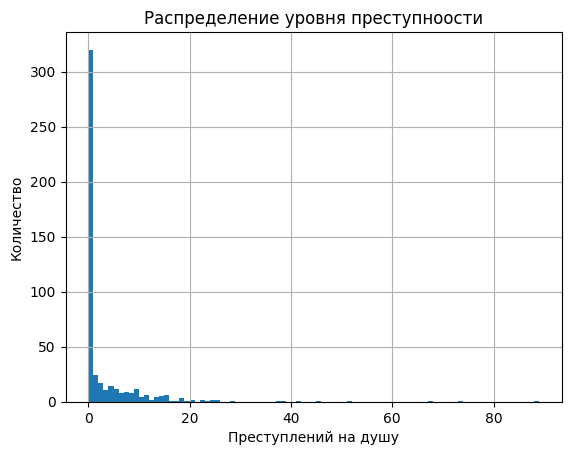

In [8]:
df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

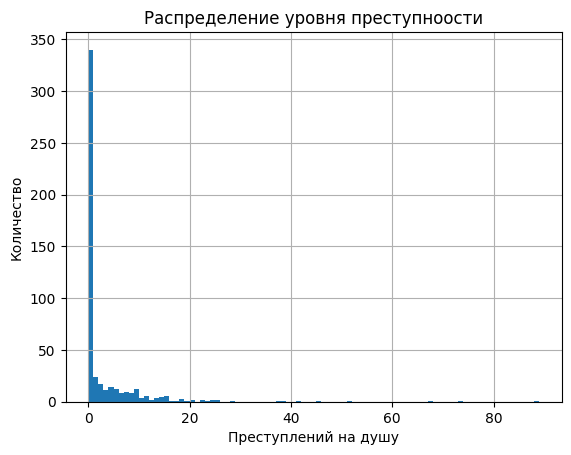

In [9]:
df = df.fillna(value={"CRIM": 0})

df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "ZN" в соответствии с описанием "ZN - proportion of residential land zoned for lots over 25,000 sq.ft."

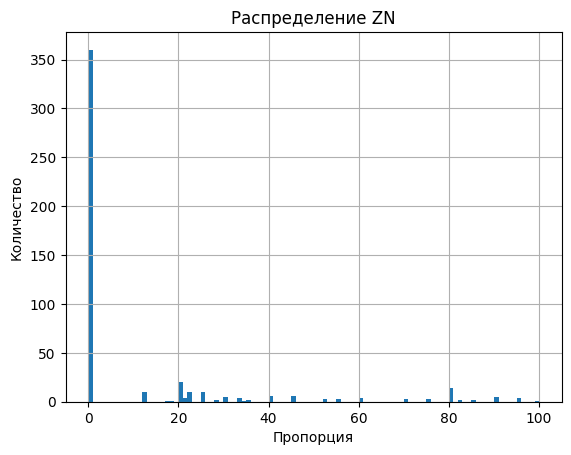

In [10]:
df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

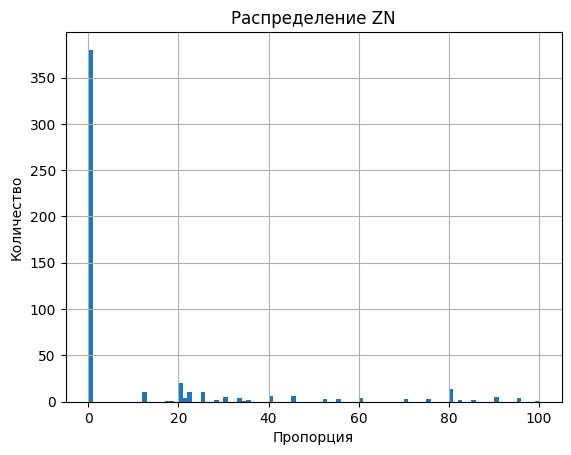

In [11]:
df = df.fillna(value={"ZN": 0})

df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "INDUS" в соответствии с описанием "INDUS - proportion of non-retail business acres per town."

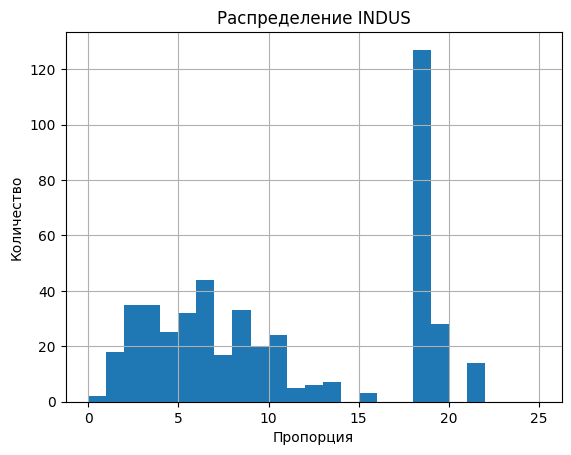

In [12]:
df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

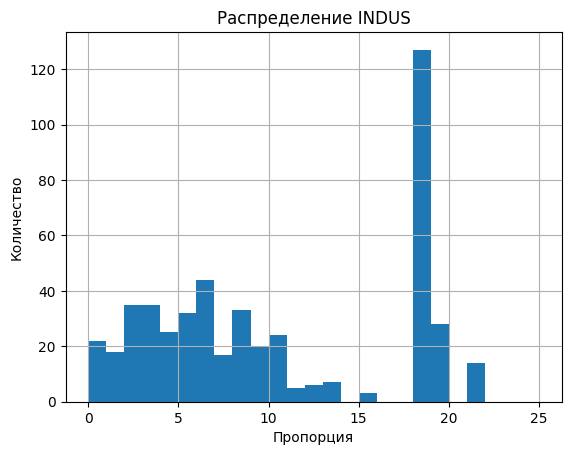

In [13]:
df = df.fillna(value={"INDUS": 0})

df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Не удаляю пропуски в категориальном признаке "CHAS" в соответствии с описанием "CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)"

In [14]:
df = df.fillna(value={"CHAS": 2})

## Заполняю пропуски в численном признаке "AGE" в соответствии с описанием "AGE - proportion of owner-occupied units built prior to 1940"

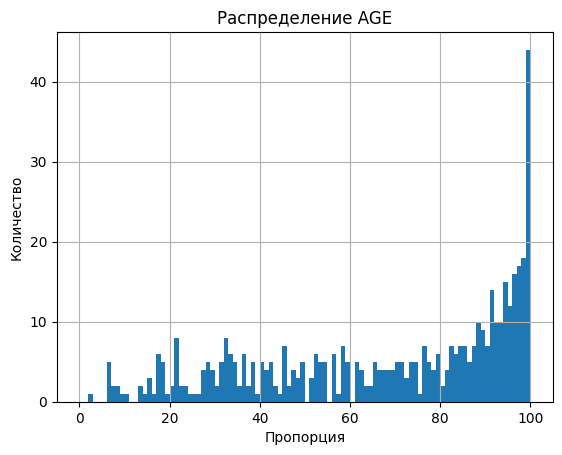

In [15]:
df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

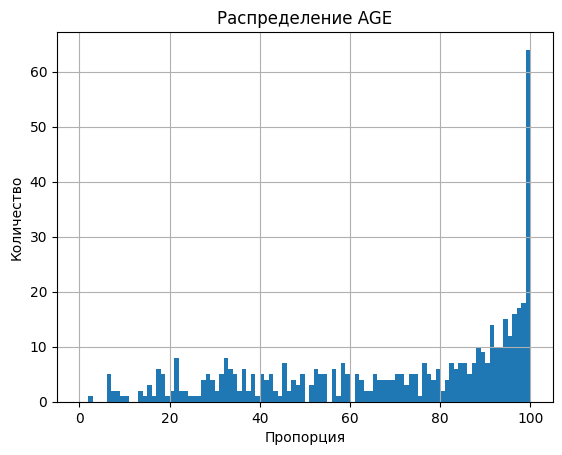

In [16]:
df = df.fillna(value={"AGE": 100})

df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "LSTAT" в соответствии с описанием "LSTAT - % lower status of the population"

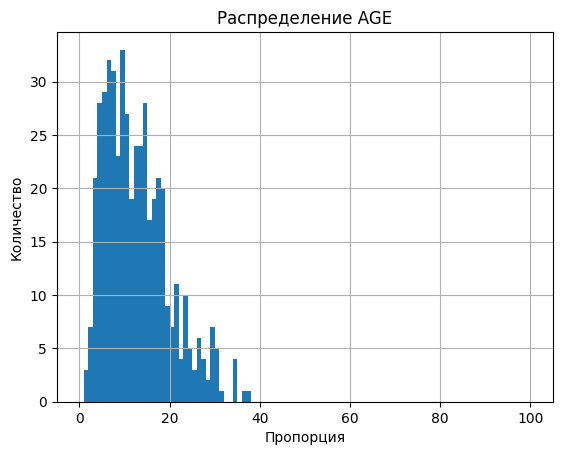

In [17]:
df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

11.43


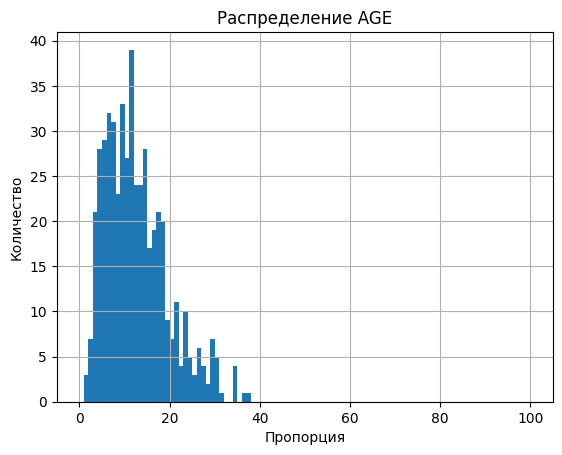

In [18]:
med = df.LSTAT.median()
print(med)
df = df.fillna(value={"LSTAT": int(med)})

df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

In [19]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Преобразую категориальные признаки (one hot encoding)

In [20]:
for to_enc in ["CHAS"]:
    one_hot = pd.get_dummies(df[to_enc]).astype(int)
    del df[to_enc]
    df = df.join(one_hot)
df.columns = df.columns.map(str)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0.0,1.0,2.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.00,36.2,1,0,0


## Провожу разделение на тестовую и обучающую выборки, обучаю и тестирую KNN для предсказания признака MEDV (регрессия), оцениваю с помощью MAE, MSE

In [21]:
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   return("{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

In [22]:
y = df.MEDV.copy()
X = df.loc[:, df.columns != "MEDV"].copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
model = KNeighborsRegressor(n_neighbors=2)

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MSE = %.4f" % testMSE)
print("Train MSE = %.4f" % trainMSE)

Test MAE = 4.7790
Train MAE = 2.5242
Test MSE = 43.3266
Train MSE = 14.9951


In [25]:
KNeighborsRegressorMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["KNeighborsRegressor"])
KNeighborsRegressorMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
KNeighborsRegressor,2.524189,4.779042,14.995103,43.326647,00:00:00,00:00:00,00:00:00


## Провожу подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцениваю качество оптимальных моделей

### GridSearchCV + KFold

In [26]:
model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

#start = time.time()
grid_search.fit(X_train, y_train)
#end = time.time()
#fitTime = exec_time(start, end)

model = grid_search.best_estimator_

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MSE = %.4f" % testMSE)
print("Train MSE = %.4f" % trainMSE)

Test MAE = 4.5034
Train MAE = 3.7670
Test MSE = 37.5112
Train MSE = 29.1933


In [27]:
KNeighborsRegressorGridSearchKFoldMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["KNeighborsRegressorGridSearchKFold"])
KNeighborsRegressorGridSearchKFoldMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
KNeighborsRegressorGridSearchKFold,3.766962,4.503443,29.193296,37.511194,00:00:00,00:00:00,00:00:00


### RandomizedSearchCV + RepeatedKFold

In [28]:
model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(1, 31)
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

#start = time.time()
random_search.fit(X_train, y_train)
#end = time.time()
#fitTime = exec_time(start, end)

model = random_search.best_estimator_

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MSE = %.4f" % testMSE)
print("Train MSE = %.4f" % trainMSE)

Test MAE = 4.6490
Train MAE = 4.4235
Test MSE = 40.5287
Train MSE = 39.3962


In [29]:
KNeighborsRegressorRandomizedSearchRepeatedKFoldMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["KNeighborsRegressorRandomizedSearchRepeatedKFold"])
KNeighborsRegressorRandomizedSearchRepeatedKFoldMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
KNeighborsRegressorRandomizedSearchRepeatedKFold,4.4235,4.649035,39.396214,40.528699,00:00:00,00:00:00,00:00:00


## Провожу сравнение исходной и оптимальной моделей

In [30]:
AllMAE = pd.concat([KNeighborsRegressorMAE, KNeighborsRegressorRandomizedSearchRepeatedKFoldMAE, KNeighborsRegressorGridSearchKFoldMAE])
AllMAE.sort_values(by=["Test MSE"])

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
KNeighborsRegressorGridSearchKFold,3.766962,4.503443,29.193296,37.511194,00:00:00,00:00:00,00:00:00
KNeighborsRegressorRandomizedSearchRepeatedKFold,4.423500,4.649035,39.396214,40.528699,00:00:00,00:00:00,00:00:00
KNeighborsRegressor,2.524189,4.779042,14.995103,43.326647,00:00:00,00:00:00,00:00:00
